<a href="https://colab.research.google.com/github/Darsh-502/codealpha_stock_prediction/blob/main/cat_v_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:04<00:00, 247MB/s]
100% 1.06G/1.06G [00:04<00:00, 253MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip' ,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [13]:
# genertors
train_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256,256)

)

validation_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalize
def process(image,label):
  image= tf.cast(image/255. ,tf.float32)
  return image, label

  train_ds= train_ds.map(process)
  validation_ds= validation_ds.map(process)



In [30]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 62s 90ms/step - loss: 0.7984 - accuracy: 0.6187 - val_loss: 0.6869 - val_accuracy: 0.6236
Epoch 2/10
625/625 [==============================] - 61s 96ms/step - loss: 0.5351 - accuracy: 0.7313 - val_loss: 0.5945 - val_accuracy: 0.6744
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4436 - accuracy: 0.7881 - val_loss: 0.5223 - val_accuracy: 0.7402
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.3925 - accuracy: 0.8163 - val_loss: 0.4754 - val_accuracy: 0.7742
Epoch 5/10
625/625 [==============================] - 57s 91ms/step - loss: 0.3355 - accuracy: 0.8425 - val_loss: 0.4592 - val_accuracy: 0.7822
Epoch 6/10
625/625 [==============================] - 60s 96ms/step - loss: 0.2718 - accuracy: 0.8749 - val_loss: 0.5190 - val_accuracy: 0.7802
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.2235 - accuracy: 0.8965 - val_loss: 0.7174 - val_accuracy:

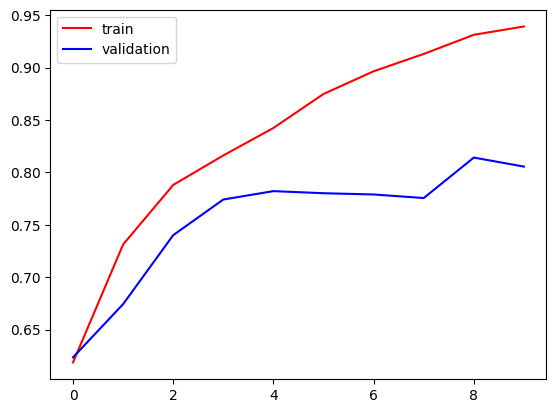

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

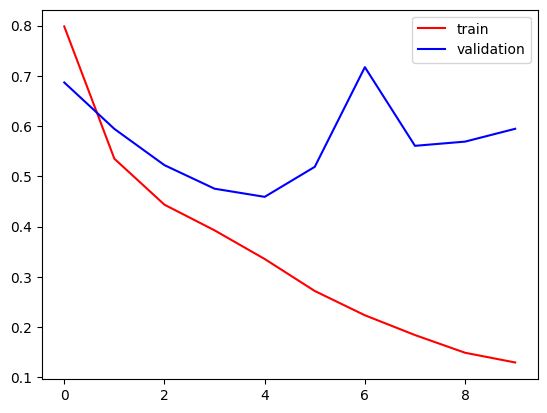

In [35]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [36]:
import cv2

In [37]:
test_img = cv2.imread('/content/dog.jpg')

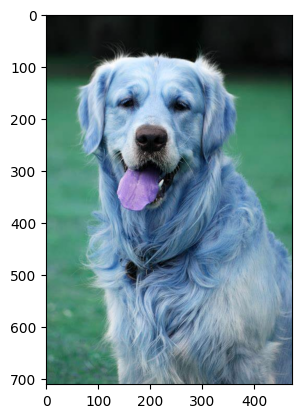

In [38]:
plt.imshow(test_img)

In [46]:
test_img.shape

(256, 256, 3)

In [40]:
test_img = cv2.imread('/content/cat.jpg')

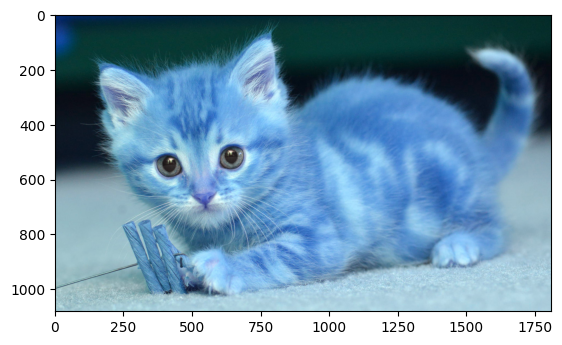

In [41]:
plt.imshow(test_img)

In [42]:
test_img.shape

(1081, 1810, 3)

In [43]:
test_img = cv2.resize(test_img,(256,256))

In [44]:
test_input = test_img.reshape((1,256,256,3))

In [45]:
model.predict(test_input)

1/1 [==============================] - 0s 432ms/step


array([[0.00211763]], dtype=float32)